In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd 
from Functions.resampler import Resampler
from Functions.cross_validation import GridSearchClassRatio
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Dataset/creditcard.csv')

In [3]:
X_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
target = 'Class'

In [4]:
X,y = df[X_cols], df[target]

In [5]:
smote = Resampler(method = 'SMOTE')

In [6]:
cv_smote_lr = GridSearchClassRatio(LogisticRegression(),k=10)

In [8]:
alpha_range = (np.arange(5)+1)/7

In [9]:
cv_smote_lr.perform_grid_search_class_ratio(smote,X,y,range_alpha = alpha_range,
                                        metric='recall')

0.7142857142857143: 100%|██████████| 5/5 [04:04<00:00, 48.82s/it]


In [ ]:
cv_smote_lr.perform_grid_search_class_ratio(smote,X,y,range_alpha = alpha_range,
                                        metric='f1_score')

In [ ]:
cv_smote_lr.perform_grid_search_class_ratio(smote,X,y,range_alpha = alpha_range,
                                        metric='precision')

In [23]:
cv_smote_lr.perform_grid_search_class_ratio(smote,X,y,range_alpha = alpha_range,
                                        metric='accuracy')

0.9: 100%|█████████████████████████████████████████████████████████████████████████████| 18/18 [12:06<00:00, 40.37s/it]


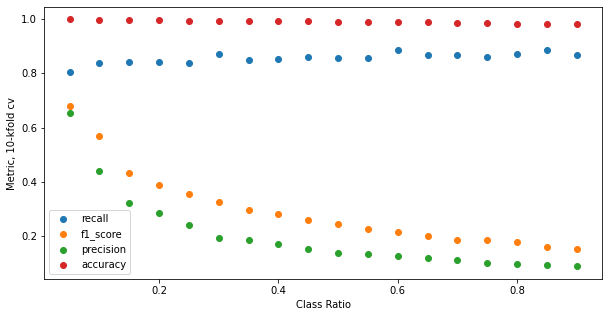

In [24]:
cv_smote_lr.plot_results(plot_type='line')

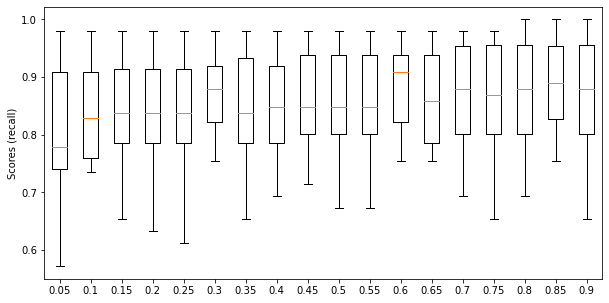

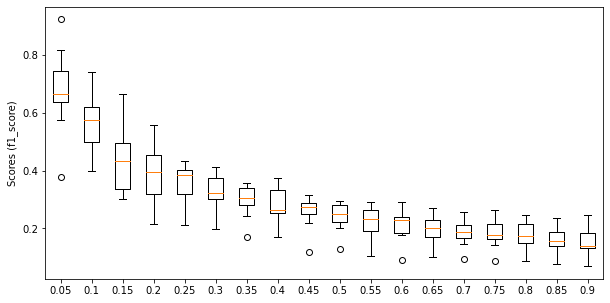

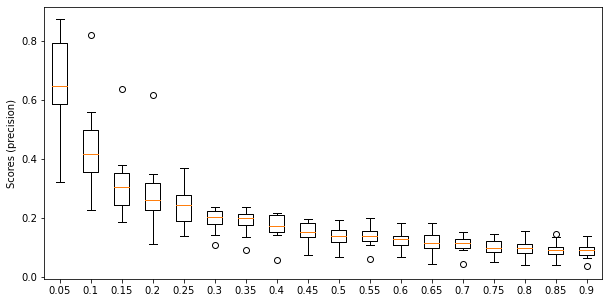

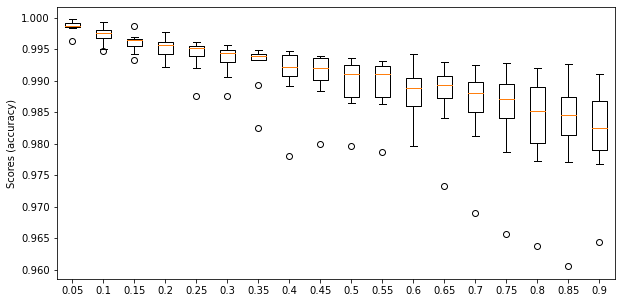

In [26]:
cv_smote_lr.plot_results(plot_type='boxplot')

In [27]:
cv_smote_small_alpha = GridSearchClassRatio(LogisticRegression(),k=10)

In [32]:
alpha_range_2 = (np.arange(9)+1)/300

In [33]:
alpha_range_2

array([0.00333333, 0.00666667, 0.01      , 0.01333333, 0.01666667,
       0.02      , 0.02333333, 0.02666667, 0.03      ])

In [34]:
cv_smote_small_alpha.perform_grid_search_class_ratio(smote,X,y,range_alpha = alpha_range_2,
                                        metric='f1_score')

0.03: 100%|██████████████████████████████████████████████████████████████████████████████| 9/9 [03:53<00:00, 25.94s/it]


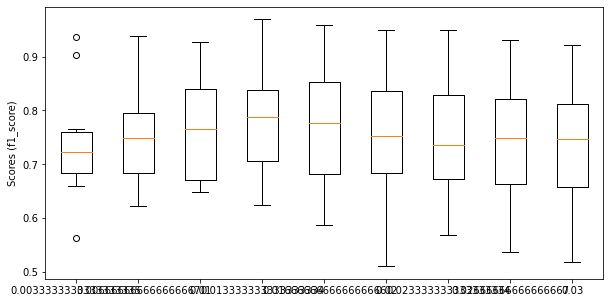

In [35]:
cv_smote_small_alpha.plot_results()

In [38]:
ropt = cv_smote_small_alpha.best_resampler_['f1_score']

In [39]:
ropt.fit(X,y)

In [41]:
Xr, yr = ropt.fit_resample(X,y)

In [42]:
yr.value_counts()

0    284315
1      8529
Name: Class, dtype: int64

In [43]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64